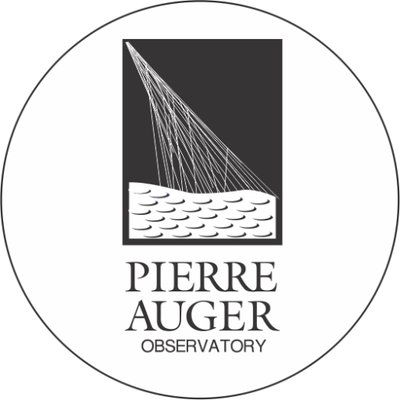
# Tutorial: How to read a json file

<i>Notebook released together with the Pierre Auger Observatory Open Data release 2021 (<a href="https://doi.org/10.5281/zenodo.4487613">DOI 10.5281/zenodo.4487613</a>). More information at the <a href="https://www.auger.org/opendata/">Auger open data website</a>.</i>

The aim of this notebook is to explore the content of an event file using python and to help in plotting pseudo-raw data.

## Import some standard python libraries that contain basic functions used along the notebook.

In [21]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import zipfile

# Jupyter/ IPython formatting
from IPython.display import Math, Latex, display

In [22]:
# Default values for plots
plt.rcParams["figure.figsize"] = [14, 9] # figure width and height
plt.rcParams["font.size"] = 20

In [23]:
# Data loading, encapsulated to make it less installation and OS dependant
import os.path
from pathlib import Path
from zipfile import ZipFile
def AugerLoad(fdir,file):
    """
    Loads a file from the auger open data release. Can be either in the local directory,
    in the parent directory or in the augeropendata directory.
    File is identified by it directory *fdir* and filename *file* and can be found in the directory
    or in a zip file.
    """
    for loc in [".","..","augeropendata"]:
        fname=os.path.join(loc,fdir,file)
        if os.path.isfile(fname):
            return open(fname)
        zname=os.path.join(loc,fdir+".zip")
        if os.path.isfile(zname):
            with ZipFile(zname) as myzip:
                return myzip.open(Path(fdir).joinpath(file).as_posix())

## Load an event file from the zipped or unzipped folder using a json parser

Select an event from the list

In [24]:
filename = 'Auger_071656066300.json' #select an event by file name

# Interesting examples
#filename = 'Auger_070137858700.json' # Highest energy event
#filename = 'Auger_061856616000.json' # Highest multiplicity event
#filename = 'Auger_182318542300.json' # Low energy event
#filename = 'Auger_050035605500.json' # Low energy hybrid
#filename = 'Auger_131525201200.json' # Hybrid with only 2 SD stations, triggered by FD
#filename = 'Auger_051035232600.json' # Golden Hybrid event
#filename = 'Auger_172657447200.json' # Golden Hybrid event at large distance from FD
#filename = 'Auger_062636056300.json' # Low energy multi-eye event
#filename = 'Auger_081847956000.json' # Highest energy multi-eye event


data=json.load(AugerLoad('data',filename))
                


##### In the following,  a dataframe is created for each section of the event file.

In [25]:
#sdrec contains SD reconstruction parameters
sdrec = pd.Series(dtype=object)

try:
    sdrec  = pd.Series(data['sdrec'])
except:
    display(Latex(f'no sdrec data'))    
else:
    display(Latex(f'sdrec columns:'))
    display(Latex(f'{sdrec.index.values}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [26]:
# 
# Eyes contains the pixel traces
eyes = pd.DataFrame()
fdrec = pd.DataFrame()

try:
    fdrec = pd.DataFrame(data['fdrec'])
except:
    display(Latex(f'no FD rec data'))
else:
    fdrec.set_index('id', inplace=True)
    display(Latex(f'fdrec columns:'))
    display(Latex(f'{fdrec.columns.values}'))
    
try:
    eyes = pd.DataFrame(data['eyes'])
except:
    display(Latex(f'no FD eye data'))
else:
    eyes.set_index('id', inplace=True)
    display(Latex(f'eyes columns:'))
    display(Latex(f'{eyes.columns.values}'))

        

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [27]:
#these sections are present in all files
meta = pd.Series(data['meta'])
display(Latex(f'''meta columns:'''))
display(Latex(f'''{meta.index.values}'''))

info = pd.Series(data['info'])
display(Latex(f'''info columns:'''))
display(Latex(f'''{info.index.values}'''))

flags = pd.Series(data['flags'])
display(Latex(f'''flags columns:'''))
display(Latex(f'''{flags.index.values}'''))

#stations contain the signal of the 3 pmts of the wcds and some related parameters
stations = pd.DataFrame(data['stations'])
stations.set_index('id', inplace=True)
display(Latex(f'''stations columns:'''))
display(Latex(f'''{stations.columns.values}'''))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Print the content of the dataframes:

In [28]:
display(meta)

type                                             auger data release
release                                                           1
format                                                            1
reconstruction    {'software': 'Offline', 'version': 'v3r99p1-ic...
dtype: object

In [29]:
display(info)

id                  71656066300
sdid                    3566570
gpstime               865918276
date       2007-06-15T04:51:02Z
dtype: object

In [30]:
if (sdrec.empty == False):
    display(sdrec) 
else :
    display(Latex(f'''no sd data'''))


gpsnanotime                                         78379000
theta                                                  54.77
dtheta                                                  0.23
phi                                                   337.90
dphi                                                    0.30
energy                                                  4.96
denergy                                                 0.44
l                                                       8.42
b                                                     -56.87
ra                                                    335.10
dec                                                   -35.71
x                                                  -27465.74
dx                                                     50.60
y                                                    3556.98
dy                                                     38.60
z                                                      42.85
easting                 

In [31]:
display(stations.head(3))

,name,x,y,z,t,dt,signalStartBin,signalStopBin,signal,dsignal,sat,isSelected,spDistance,dspDistance,pmt1,pmt2,pmt3
id,,,,,,,,,,,,,,,,,
1072,Salta,-26631.06,3110.09,37.36,78369246,13.38,242,366,75.74,9.83,1,1,560.10,29.39,"[0.08, 0.08, 0.08, 0.65, -0.49, 0.08, 0.08, 0....","[0.09, 0.09, 0.09, 0.7, -0.52, 0.09, 0.7, 0.09...","[0.22, -0.39, -0.39, 0.22, 0.22, 0.22, 0.22, 0..."
1070,Sil,-28140.22,3110.16,46.70,78373038,13.50,241,313,37.46,7.18,0,1,718.95,37.42,"[-0.01, -0.01, -0.01, 0.0, 0.0, 0.0, 0.0, -0.0...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[-0.0, -0.0, -0.0, 0.01, 0.01, -0.0, -0.0, -0...."
626,Estelle,-27393.18,4399.57,41.51,78372485,14.07,241,303,27.07,6.11,0,1,821.07,37.08,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0, -0.0, -0.0, -0.0, -0.02, -0.0, -0.0, -0...","[0.01, 0.01, 0.01, 0.01, -0.01, -0.01, 0.01, -..."


In [32]:
if not fdrec.empty:
    display(fdrec) 
else :
    display(Latex(f'''no FD data'''))


,gpsnanotime,hdSpectrumEye,hdCalibEye,hdXmaxEye,theta,dtheta,phi,dphi,l,b,...,altitude,cherenkovFraction,minViewAngle,uspL,duspL,uspR,duspR,hottestStationId,distSdpStation,distAxisStation
id,,,,,,,,,,,,,,,,,,,,,
4,78475141,1,1,1,54.70,0.38,337.89,0.39,8.36,-56.81,...,1493.73,0.16,21.11,239.89,5.81,0.29,0.04,1072,432.80,623.95


##### Print some event information

In [33]:
display(Latex(f'event id : {info.id}'))
display(Latex(f'event date : {info.date}'))
display(Latex(f'event gps : {info.gpstime}'))
display(Latex(f'N° of stations : {len(stations)}'))

if not sdrec.empty:
    display(Latex(f'''N° of recstations : {len(sdrec.recstations)} '''))
    display(Latex(f'''recstations ids : {sdrec.recstations} '''))
else:
    display(Latex(f'''N° of recstations : 0 '''))
    
if not eyes.empty:
    display(Latex(f'''N° of eyes : { len(eyes)} '''))
    display(Latex(f'''eye ids: {eyes.index.values} '''))
else:
    display(Latex(f'''N° of eyes : 0 '''))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Plot some date related to the Surface Detector

Signals from a single detector station

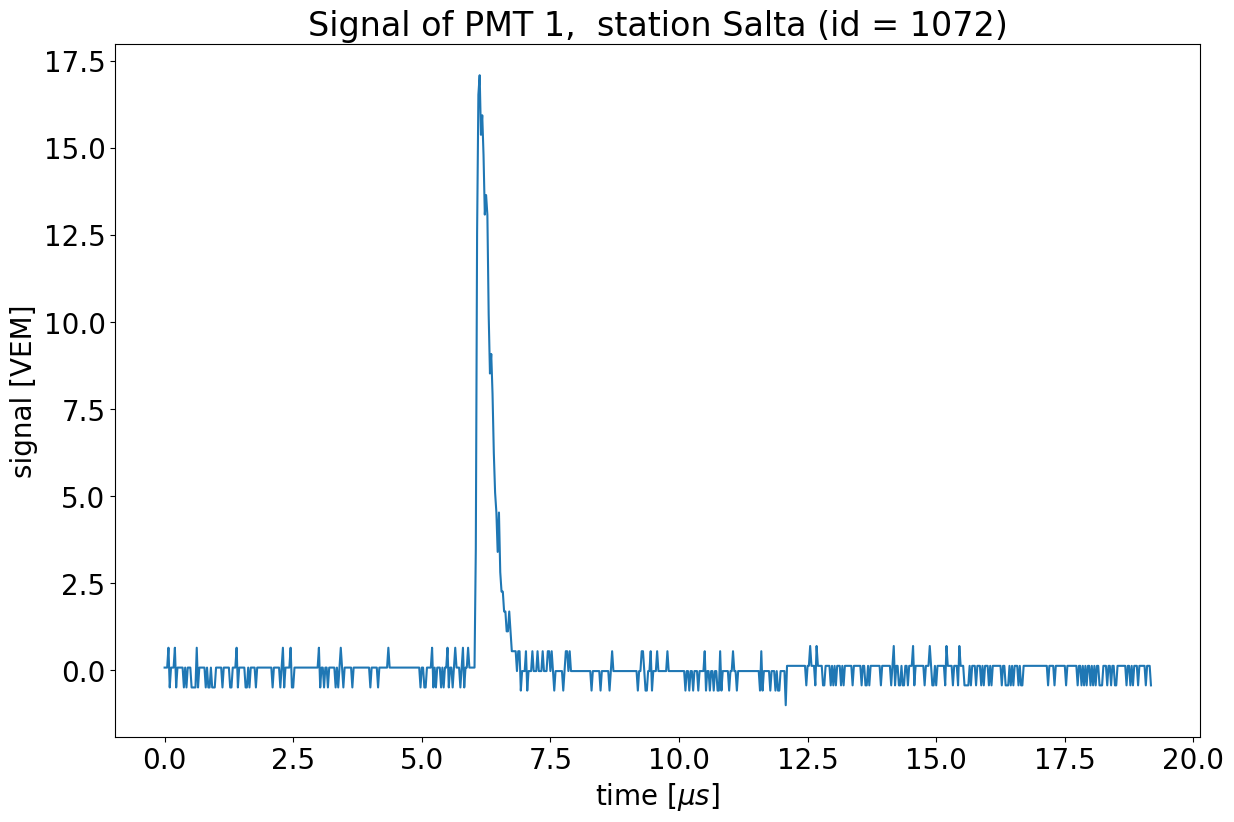

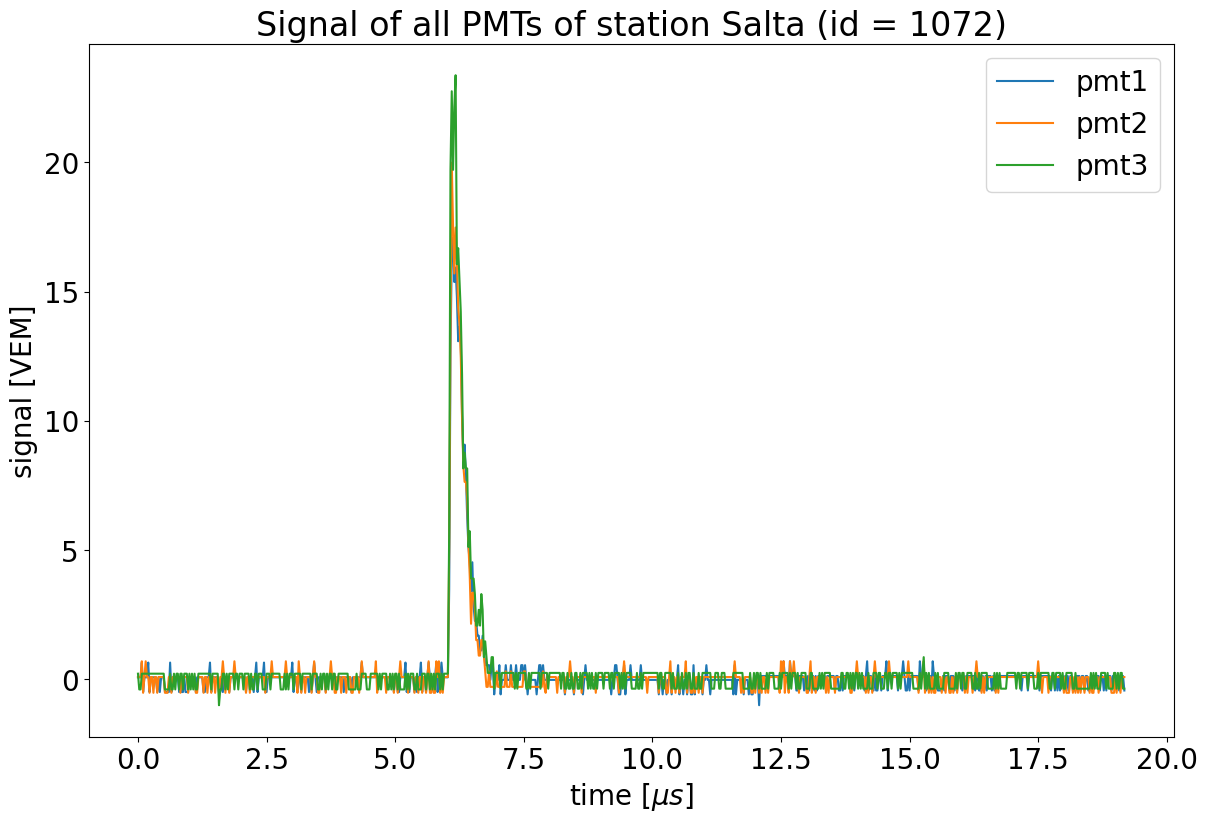

In [34]:
#select a station:
wcd = stations.iloc[0] #select the first station 

#create a vector for the x-axis: 1 bin = 25 ns 
binsize = 0.025 # 25 ns, in µs
time = [np.arange(len(wcd[f'pmt{i + 1}'])) * binsize for i in range(3)]

#print the signal of pmt1
plt.plot(time[0], wcd.pmt1)
plt.title(f'Signal of PMT 1,  station {wcd["name"]} (id = {wcd.name})') # cannot use wcd.name, this produces the 'id'.
plt.xlabel('time [$\mu s$]')
plt.ylabel('signal [VEM]')
plt.show()

#print the signal of all pmts of the station
for i in range(3):
    pmt = f'pmt{i + 1}'
    plt.plot(time[i], wcd[pmt], label=pmt)

plt.title(f'Signal of all PMTs of station {wcd["name"]} (id = {wcd.name})')
plt.xlabel('time [$\mu s$]')
plt.ylabel('signal [VEM]')
plt.legend()
plt.show()

Signals of all stations:

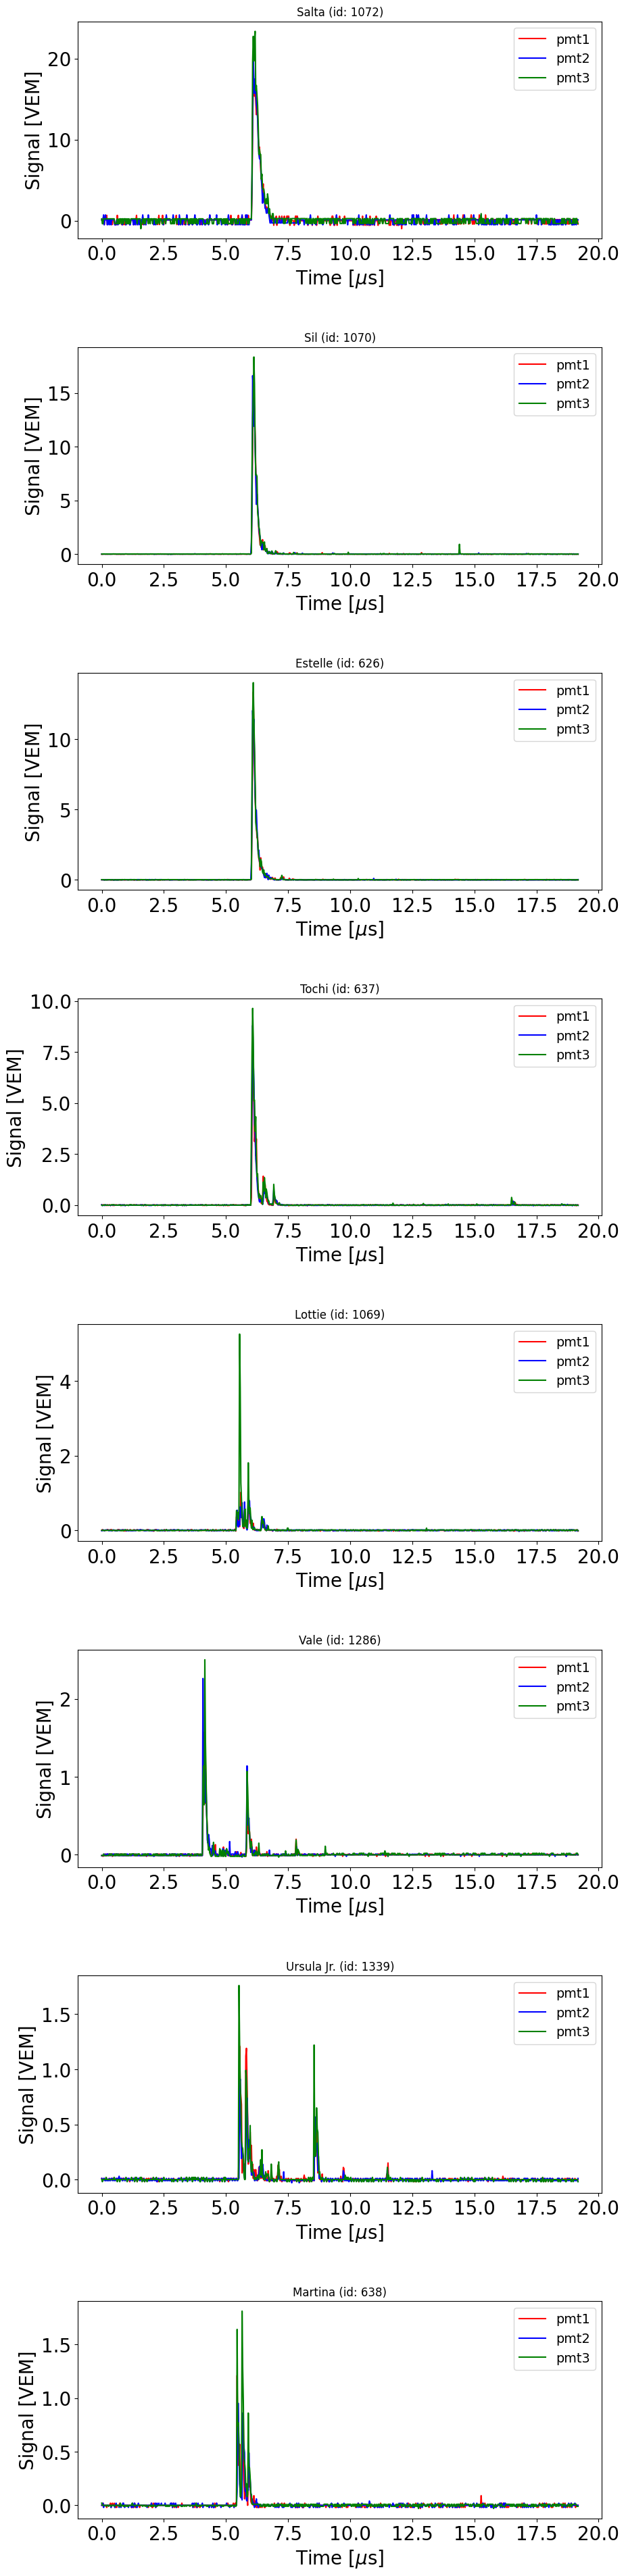

In [35]:
binsize = 0.025
fig, axs = plt.subplots(len(stations), 1, figsize=(10, 6*len(stations)))

for (station_id, station), ax in zip(stations.iterrows(), axs):
    for pmt_idx, color in enumerate(['r', 'b', 'g']):
        pmt = f'pmt{pmt_idx + 1}'
        time = np.arange(len(station[pmt])) * binsize
        try:
            ax.plot(time, station[pmt], color, label=pmt)
        except:
            pass

    ax.set_ylabel('Signal [VEM]')
    ax.set_xlabel('Time [$\mu $s]')
    ax.legend(fontsize='x-small')
    title = f'{station["name"]} (id: {station_id})'
    ax.set_title(title, fontsize=12)


plt.subplots_adjust(hspace = .5)
plt.show()


## Plot the shower footprint

Read the array information and join into the station list...

In [36]:
#read stations positions in UTM coordinates system...
mapSD = pd.read_csv(AugerLoad("auxiliary","sdMap.csv"), index_col='id')
# ... and add to the stations
try:
    stations = stations.join(mapSD, how='inner')
except ValueError: # in case we are re-running this cell
    pass

... and now plot the map with the stations from the event

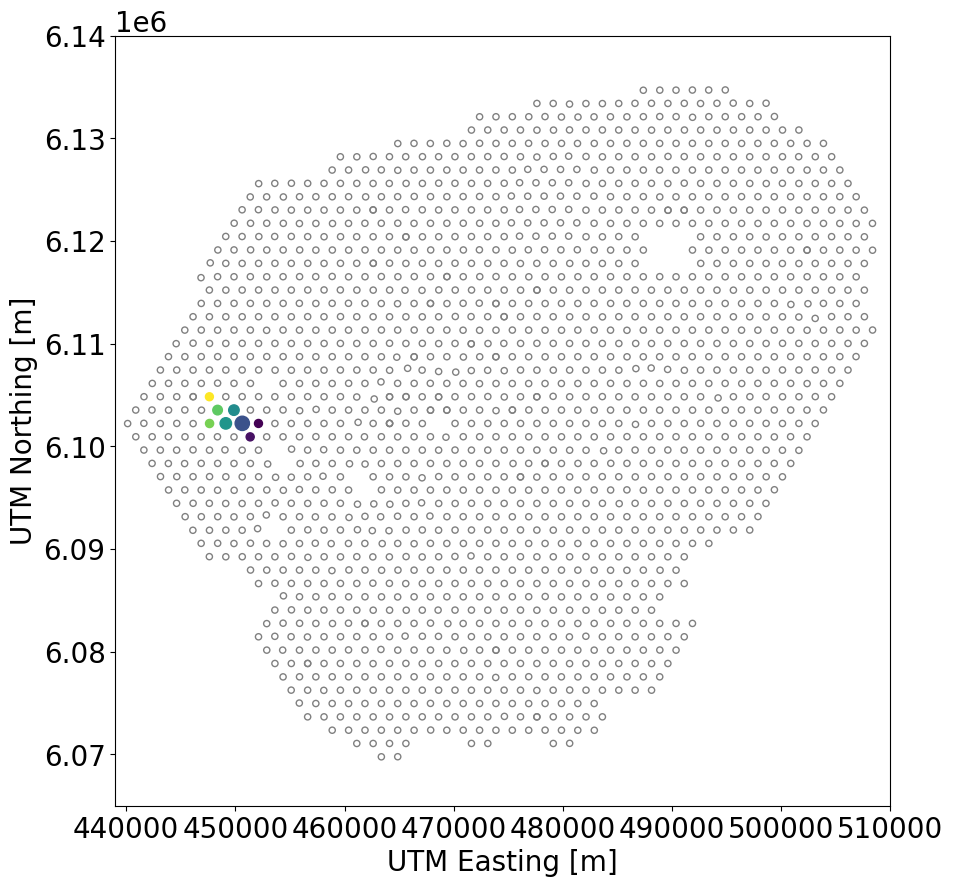

In [37]:
selected = stations[stations.isSelected == 1]
random = stations[stations.isSelected == 0]

size = 30 + selected.signal%100

plt.figure(figsize=(10, 10))
plt.scatter(mapSD.easting, mapSD.northing, s=20 , facecolors='none', edgecolors='grey',marker='o')
plt.scatter(selected.easting, selected.northing, s=size, c=selected.t ,cmap='viridis' )
plt.scatter(random.easting, random.northing, facecolors='none', edgecolors='black',marker='o')

plt.xlim(439000, 510000)
plt.ylim(6065000, 6140000)
plt.xlabel('UTM Easting [m]')
plt.ylabel('UTM Northing [m]')
plt.show()

Convert and compare the station positions between the event and the detector map

In [38]:
E0 = 477256.66         #Easting of the Auger-site center (longitude  69.25˚ W)
N0 = 6099203.68        #Northing of the Auger-site center (latitude 35.35˚ S)
A0 = 1400              #Altitude of the Auger-site center [m]
alpha = 2.52e-3        #Rotation angle
beta = 6.03e-4         #Scaling factor
R = 6368000           #Earth’s radius

stations['E'] = E0 + (1-beta)*stations.x - alpha*stations.y 
stations['N'] = N0 + (1-beta)*stations.y + alpha*stations.x
stations['A'] = A0 + stations.z + (pow(stations.x,2) + pow(stations.y,2))/2/R
stations['Delta E'] = stations.easting - stations.E
stations['Delta N'] = stations.northing - stations.N
stations['Delta A'] = stations.altitude - stations.A

pd.options.display.float_format = '{:.2f}'.format
display(stations[['easting', 'E', 'Delta E', 'northing', 'N', 'Delta N', 'altitude', 'A', 'Delta A']])

,easting,E,Delta E,northing,N,Delta N,altitude,A,Delta A
id,,,,,,,,,
1072,450634.21,450633.82,0.39,6102244.86,6102244.78,0.08,1493.64,1493.81,-0.17
1070,449126.02,449125.57,0.45,6102241.13,6102241.05,0.08,1509.45,1509.64,-0.19
626,449869.34,449868.91,0.43,6103531.63,6103531.57,0.06,1501.78,1501.95,-0.17
637,448373.92,448373.43,0.49,6103535.66,6103535.59,0.07,1515.64,1515.83,-0.19
1069,447638.86,447638.35,0.51,6102229.73,6102229.66,0.07,1524.49,1524.69,-0.20
1286,451358.46,451358.10,0.36,6100927.49,6100927.42,0.07,1484.39,1484.54,-0.15
1339,452119.87,452119.52,0.35,6102234.34,6102234.27,0.07,1482.17,1482.31,-0.14
638,447623.36,447622.86,0.50,6104835.80,6104835.73,0.07,1518.30,1518.50,-0.20


## The signals as a function of the distance from the shower core

Plot the station signals as a function of the distance from the core and superimpose the fit function using the parameters 'beta' and 'gamma': the so called 'lateral distribution function'
$$
s(r) = r^\beta * \Bigl(\frac{d + 700}{1700}\Bigr)^{\beta + \gamma}
$$
with the distance $r$ in meters.

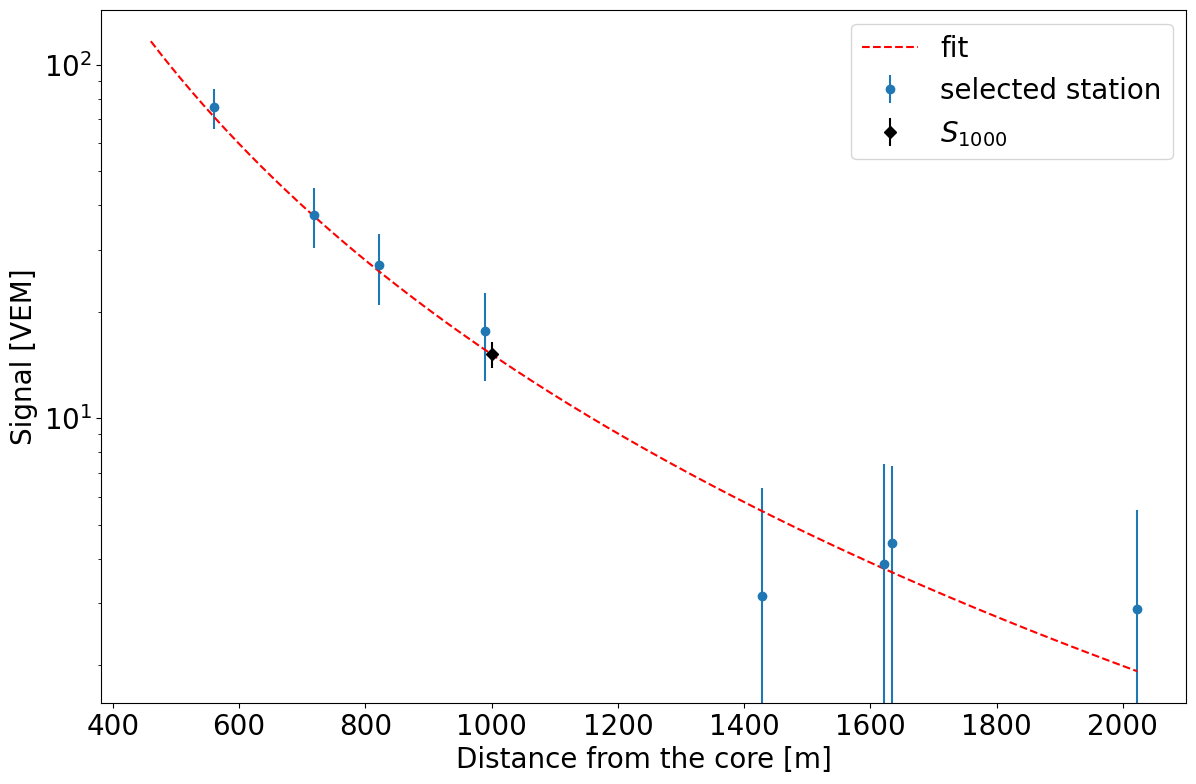

In [39]:
try:
    s1000     = sdrec.s1000
    s1000err  = sdrec.ds1000
    beta      = sdrec.beta
    gamma     = sdrec.gamma
except :
    display(Latex('no sd data'))
else:

    d = np.linspace(max(selected.spDistance.min()-100, 10), selected.spDistance.max(), 1000)
    fit = s1000 * pow(d/1000, beta) * pow((d+700)/(1000+700), beta+gamma)

    plt.errorbar(selected.spDistance, selected.signal, yerr=selected.dsignal, 
                 label="selected station", marker='o', linestyle='none')
    plt.errorbar(1000, s1000, yerr=s1000err, 
                 label="$S_{1000}$", fmt='kD', linestyle='none')
    plt.plot(d, fit, 'r', label="fit", linestyle='--')
    plt.xlabel("Distance from the core [m]")
    plt.ylabel("Signal [VEM]")
    plt.yscale('log')
    plt.legend()
    plt.show()


## Plot data from the Fluorescence Detector

Load the pixel data

In [40]:
#load the pixels map
mapPix = pd.read_csv(AugerLoad('auxiliary','fdPixelMap.csv'), index_col=['eye', 'pixel'])

Start with traces in the camera

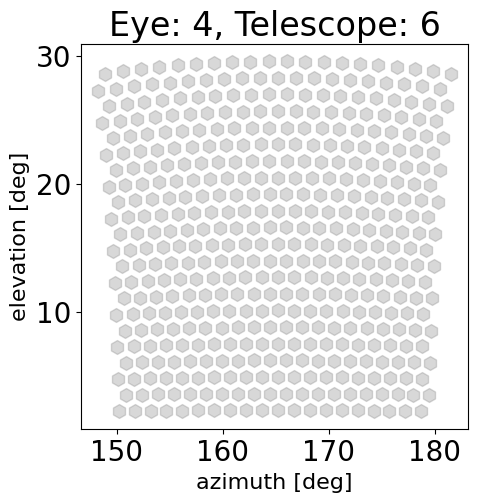

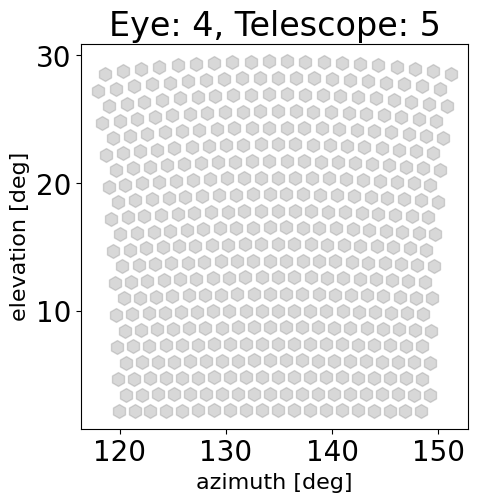

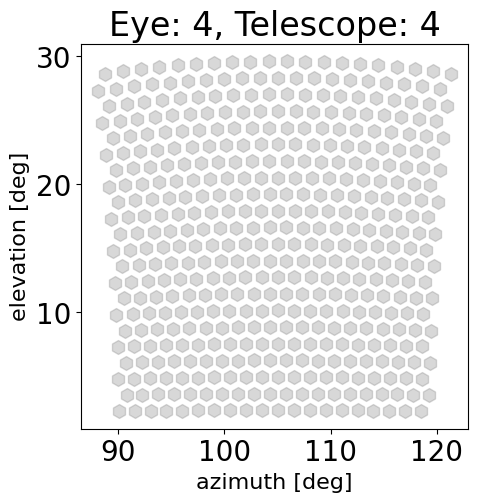

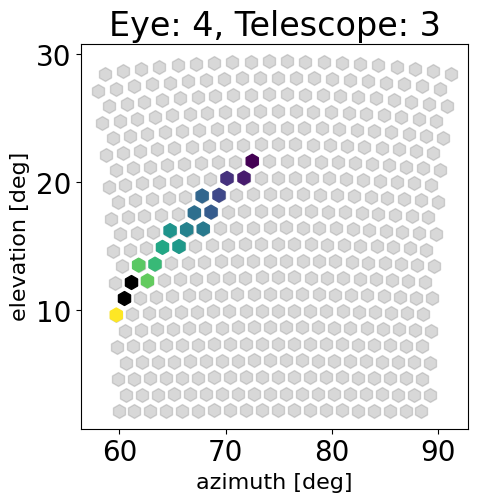

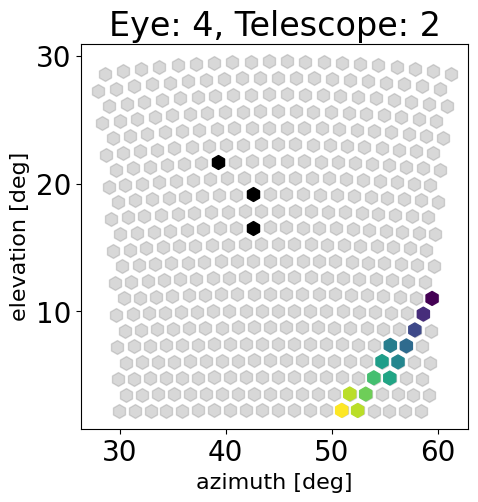

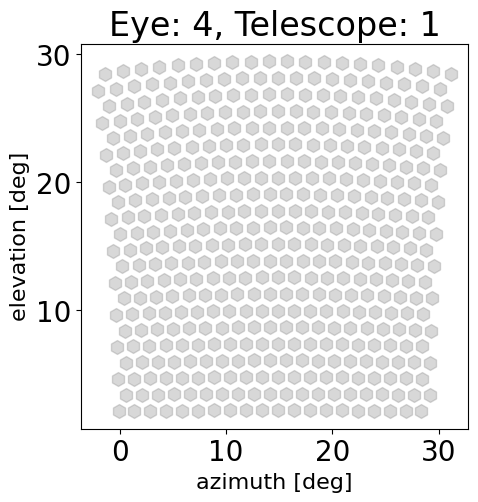

In [41]:
#first eye (automatic selection)
eye_ID = None
#or select the eye 1 = Los Leones , 2 = los Morados , 3 = Loma Amarilla,  4 = Coihueco
#eye_ID = 2

try:
    #select an eye
    if eye_ID is None:
        eye_ID = eyes.iloc[0].name
    selEye = eyes.loc[eye_ID]
except:
    display(Latex(f'no fd data or wrong eye-id selection'))
else:
    mapEye = mapPix.loc[eye_ID]
    
    eyeName = selEye["name"]
    pixel_fields = ["pixelID", "pixelStatus", "pixelTime", "pixelCharge"]
    pixels = pd.DataFrame(dict(zip(pixel_fields, selEye[pixel_fields]))).join(mapEye, how="inner", on="pixelID")
    #select good pixels: pixelStatus==4
    good_pixels = pixels[pixels.pixelStatus==4] 
    bad_pixels = pixels[pixels.pixelStatus!=4] 

    #display(good_pixels)
    tel_list = [6, 5, 4, 3, 2, 1] #choose the telescopes to plot
    for tel_id in tel_list:
        mapTel = mapEye[mapEye.tel == tel_id]
        good = good_pixels[good_pixels.tel == tel_id]
        bad = bad_pixels[bad_pixels.tel == tel_id]
        color = good.pixelTime

        plt.figure(figsize=(5, 5))
        plt.scatter(mapTel.azimuth,mapTel.elevation , c='grey', marker='h', alpha=0.3, s=100)
        plt.scatter(good.azimuth, good.elevation, marker='h', c=color , s=100)
        plt.scatter(bad.azimuth, bad.elevation, marker='h', c='black', s=100)
        plt.title(f'Eye: {eye_ID}, Telescope: {tel_id}')
        plt.xlabel('azimuth [deg]', fontsize=16)
        plt.ylabel('elevation [deg]', fontsize=16)
        plt.show()

Plot the whole trace

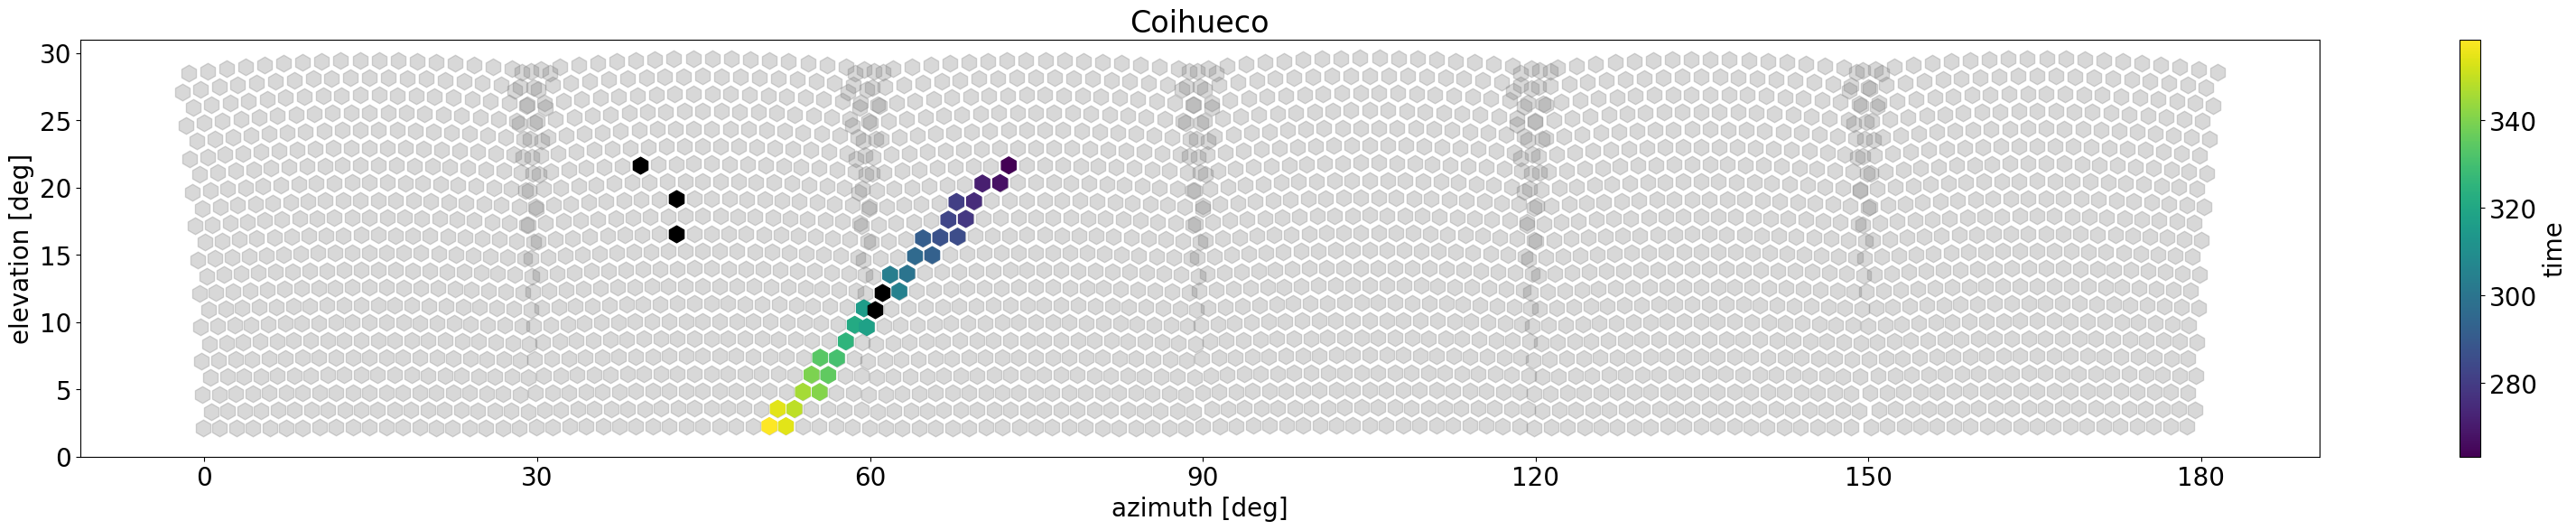

In [42]:
if not eyes.empty:
    fig, axs = plt.subplots(len(eyes), 1, figsize=(40, 10*len(eyes) - 4))
    if len(eyes) > 1:
        plt.subplots_adjust(hspace=0.3)
    try:
        axs[0]
    except TypeError:
        axs = np.array([axs])

    for ax, (eye_ID, selEye) in zip(axs, eyes.iterrows()):
        mapEye = mapPix.loc[eye_ID]

        eyeName = selEye["name"]
        pixel_fields = ["pixelID", "pixelStatus", "pixelTime", "pixelCharge"]
        pixels = pd.DataFrame(dict(zip(pixel_fields, selEye[pixel_fields]))).join(mapEye, how="inner", on="pixelID")

        #select good pixels: pixelStatus==4
        good_pixels = pixels[pixels.pixelStatus==4] 
        bad_pixels = pixels[pixels.pixelStatus!=4] 

        ax.set_title(selEye["name"])
        ax.scatter(mapEye.azimuth, mapEye.elevation , c='grey', marker='h', alpha=0.3, s=180)
        ax.scatter(good_pixels.azimuth, good_pixels.elevation, marker='h', c=good_pixels.pixelTime, s=180)
        ax.scatter(bad_pixels.azimuth, bad_pixels.elevation, marker='h', c='black', s=180)
        ax.set_xlabel('azimuth [deg]',fontsize=20)
        ax.set_ylabel('elevation [deg]',fontsize=20)
        ax.set_xticks(np.arange(0, 181, 30))        
        ax.set_yticks(np.arange(0, 31, 5))

        clb = fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.Normalize(good_pixels.pixelTime.min(), good_pixels.pixelTime.max())), ax=ax)
        clb.set_label('time', fontsize=20)
        


    plt.subplots_adjust(hspace = .6)
    plt.show()
else:
    display(Latex(f'''no fd data or wrong eye-id selection'''))


Plot the FD energy-deposited profiles and its fit function

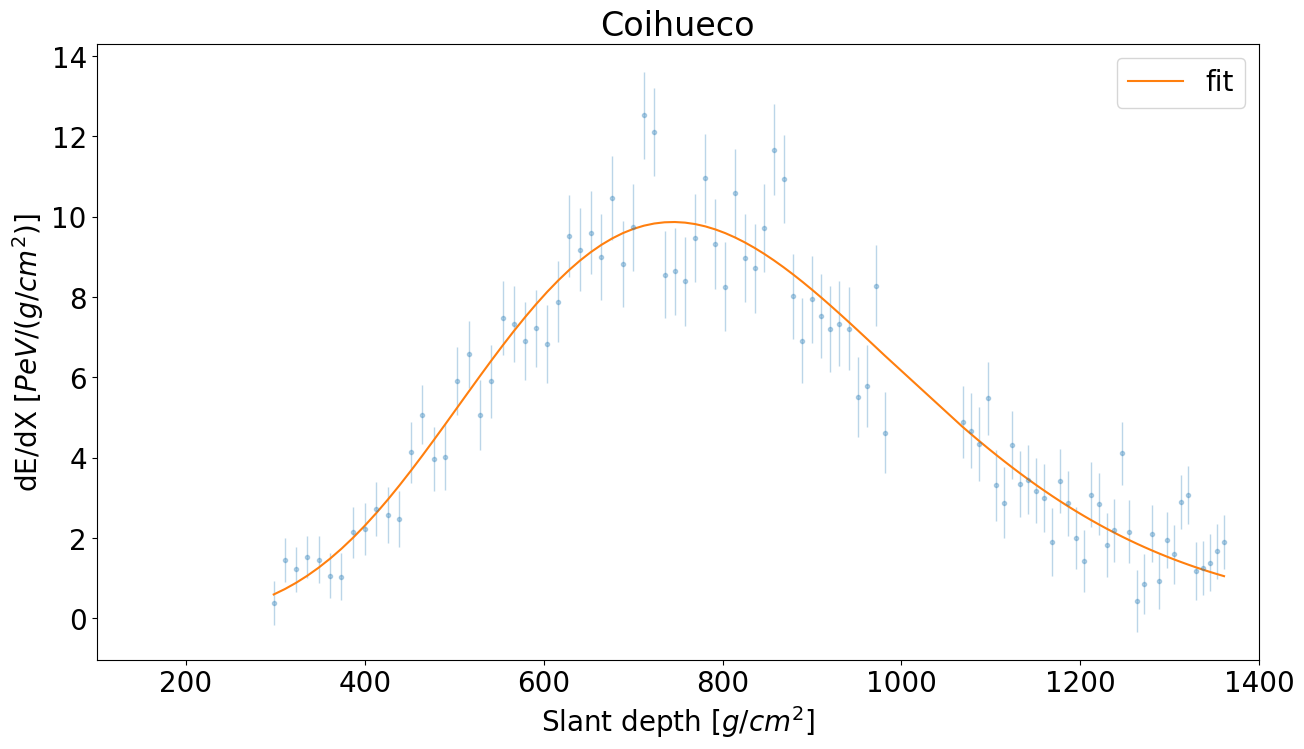

In [43]:
if not eyes.empty:
    fig, axs = plt.subplots(len(eyes), 1, figsize=(15, 8*len(eyes)))
    if len(eyes) > 1:
        plt.subplots_adjust(hspace=0.5)
    try:
        axs[0]
    except TypeError:
        axs = np.array([axs])

    for ax, (idx, eye) in zip(axs, eyes.join(fdrec, how='inner').iterrows()):
        L = eye.uspL
        R = eye.uspR
        Xmax = eye.xmax
        dEdXmax = eye.dEdXmax

        atm_fields = ["atmDepthProf", "energyDepositProf", "denergyDepositProf"]
        profile = pd.DataFrame(dict(zip(atm_fields, eye[atm_fields])))

        fit = dEdXmax*pow(1 + R*(profile.atmDepthProf-Xmax)/L, pow(R,-2)) * np.exp(-(profile.atmDepthProf-Xmax) / (R*L))
        
        ax.set_title(eye["name"])
        ax.set_xlim([100, 1400])
        ax.errorbar(profile.atmDepthProf, profile.energyDepositProf, yerr=profile.denergyDepositProf, 
                    linestyle='', marker='o', alpha=0.3, markersize=3, linewidth=1)
        ax.plot(profile.atmDepthProf, fit, label = 'fit')
        ax.set_xlabel('Slant depth $[g/cm^2]$' )
        ax.set_ylabel('dE/dX $[PeV/(g/cm^2)]$')
        ax.legend()
   
    plt.show()
else:
    display(Latex(f'no fd data'))
